In [2]:
import pandas as pd 
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import  pprint
import time
import datetime
import random
import math
import re
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import pickle
import scipy
from sklearn.datasets import load_iris

In [3]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_properties(0))

True
_CudaDeviceProperties(name='NVIDIA GeForce RTX 4060 Laptop GPU', major=8, minor=9, total_memory=8187MB, multi_processor_count=24)


In [4]:
# 鸢尾花数据集
iris=load_iris()
X,y=iris.data,iris.target
X.shape,y.shape

((150, 4), (150,))

##  数据分割
### Hold-out 留出法
留出法(hold-out)直接将数据集划分为两个互斥的集合
- 数据量大时使用
- 多次取平均
- 样本分布不均衡时需要分层采样

In [5]:
# hold-out分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

## K-fold cross validation
**“交叉验证法”**(cross validation)先将数据集D划分为k个大小相似的互斥子集，即$D=D_1\cup  D_2U\cdots \cup   D_k，D\cap D=\phi (i≠j)$.**每个子集D都尽可能保持数据分布的一致性**，即从D中通过**分层采样**得到．然后，每次用k一1个子集的并集作为训练集，余下的那个子集作为测试集；这样就可获得k组训练/测试集，从而可进行k次训练和测试，最终返回的是这k个测试结果的均值.

显然，交叉验证法评估结果的稳定性和保真性在很大程度上取决于k的取值，为强调这一点，通常把交叉验证法称为“k折交叉验证”(k-foldcrossvalidation)．k最常用的取值是10，此时称为10折交叉验证
- 测试覆盖所有样本
- 少样时使用
- 会改变训练与测试的分布
特殊:留一法:假定数据集D中包含m个样本，若令k=m，则为留一法(Leave-One-Out)，**克服了K-fold会改变数据分布的缺点**

In [6]:
# K-折交叉验证
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X= iris.data
y = iris.target
kf =KFold(n_splits=10,shuffle=True,random_state=1)# 5折交叉验证
print(f"K-fold cross validation ")
for train_index, test_index in kf.split(X, y):
    x_train,x_test=X[train_index],X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(f'{y_train.shape=} {y_test.shape=}')
# 分层K折交叉验证
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=1)
print(f"StratifiedKFold cross validation ")
for train_index, test_index in skf.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    print(f'{y_train.shape=} {y_test.shape=}')

K-fold cross validation 
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
y_train.shape=(135,) y_test.shape=(15,)
StratifiedKFold cross validation 
y_train.shape=(131,) y_test.shape=(19,)
y_train.shape=(131,) y_test.shape=(19,)
y_train.shape=(131,) y_test.shape=(19,)
y_train.shape=(131,) y_test.shape=(19,)
y_train.shape=(131,) y_test.shape=(19,)
y_train.shape=(131,) y_test.shape=(19,)
y_train.shape=(132,) y_test.shape=(18,)
y_train.shape=(132,) y_test.shape=(18,)


### Precision Recall FPR TPR 

#### 计算方法

- **Precision (精确率)**
  - 计算公式：$Precision = \frac{TP}{TP + FP}$
  - 表示预测为正类中实际为正类的比例。

- **Recall (召回率) 或 True Positive Rate (TPR, 真正率)**
  - 计算公式：$Recall = TPR = \frac{TP}{TP + FN}$
  - 表示实际为正类中被预测为正类的比例。

- **False Positive Rate (FPR, 假正率)**
  - 计算公式：$FPR = \frac{FP}{FP + TN}$
  - 表示实际为负类中被错误预测为正类的比例。
#### P-R curve
P-R图直观地显示出学习器在样本总体上的查全率、查准率.在进行比较时，若一个学习器的P-R曲线被另一个学习器的曲线完全“包住”，则可断言后者的性能优于前者

“平衡点”(Break-EventPoint，简称BEP)就是这样一个度量，它是“查准率=查全率”时的取值，例如图2.3中学习器C的BEP是0.64，而基于BEP的比较，可认为学习器A优于B，


![P-R curve](image/image.png)
#### 优缺点

- **Precision (精确率)**
  - 优点：衡量了预测为正的样本中的准确性。
  - 缺点：不考虑所有实际为正的样本，可能导致忽视模型错过的正样本（高精确率，但可能低召回率）。

- **Recall (召回率) 或 TPR**
  - 优点：衡量了模型捕捉实际正样本的能力。
  - 缺点：不关注预测为正但实际为负的样本，可能导致模型预测过多正样本（高召回率，但可能低精确率）。

- **FPR (假正率)**
  - 优点：在评估模型的时候，特别是在需要降低误报的情况下，FPR非常有用。
  - 缺点：不考虑模型错过的正样本，只关注错误标记为正的负样本比例。

不同的评价指标适用于不同的场景:
- 例如，在医疗检测中，Recall可能更加重要，因为错过一个病例（FN）的代价可能远高于错误诊断一个健康病例为病例（FP）。
- 在垃圾邮件检测中，Precision可能更重要，以避免将重要邮件错误地分类为垃圾邮件。

Text(0.5, 0, 'Precision')

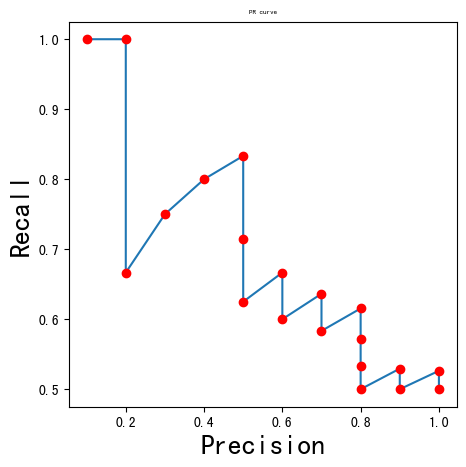

In [7]:
PR_test_data =[['T',0.9],['T',0.8],['N',0.7],['T',0.6],['T',0.55],['T',0.54],['N',0.53],['N',0.52],['T',0.51],['N',0.505],['T',0.4],['N',0.39],['T',0.38],['N',0.37],['N',0.36],['N',0.35],['T',0.34],['N',0.33],['T',0.30],['N',0.1]]
PR_thresholds = [0.9, 0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.3,0.1]
Recall =[]
Precison =[]
TPR = []
FPR =[]
for threshold in PR_thresholds:
    TP,FP,TN,FN = 0,0,0,0
    for data in PR_test_data:
        if data[1] >= threshold and data[0] == 'T':
            TP+=1
        elif data[1] >= threshold and data[0] == 'N':
            FP+=1
        elif data[1] < threshold and data[0] == 'N':
            TN+=1
        elif data[1] < threshold and data[0] == 'T':
            FN+=1
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    fpr=FP/(FP+TN)
    tpr=TP/(TP+FN)
    Recall.append(R)
    Precison.append(P)
    TPR.append(tpr)
    FPR.append(fpr)
plt.figure(figsize=(5,5))
plt.title('PR curve',fontsize=5)
plt.plot(Recall,Precison)
plt.plot(Recall,Precison,'ro')
plt.ylabel('Recall',fontsize=20)
plt.xlabel('Precision',fontsize=20)

Text(0.5, 0, 'TPR')

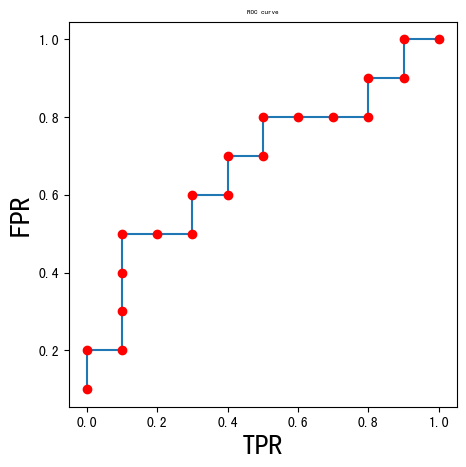

In [8]:
plt.figure(figsize=(5, 5))
plt.title('ROC curve', fontsize=5)
plt.plot(FPR, TPR)
plt.plot(FPR, TPR, 'ro')
plt.ylabel('FPR', fontsize=20)
plt.xlabel('TPR', fontsize=20)

auc=0.6799999999999999
fpr=array([0. , 0. , 0. , 0.1, 0.1, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.8, 0.8,
       0.9, 0.9, 1. ])
tpr=array([0. , 0.1, 0.2, 0.2, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9,
       0.9, 1. , 1. ])
th=array([  inf, 0.9  , 0.8  , 0.7  , 0.54 , 0.52 , 0.51 , 0.505, 0.4  ,
       0.39 , 0.38 , 0.35 , 0.34 , 0.33 , 0.3  , 0.1  ])


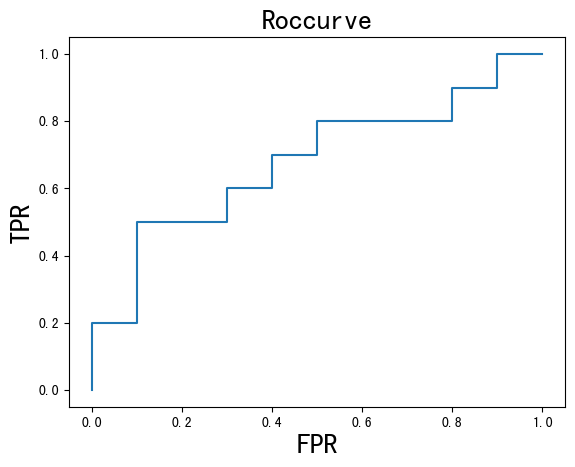

In [9]:
from sklearn.metrics import roc_auc_score,roc_curve
y_true =[] # the real label
y_score =[] #the predicted probability 
for data in PR_test_data:
    y_c=data[0]
    if y_c=='T':
        y=1
    else:
        y=0
    y_hat = data[1]
    y_true.append(y)
    y_score.append(y_hat)
auc = roc_auc_score(y_true,y_score,sample_weight=None)
fpr,tpr,th=roc_curve(y_true,y_score)
plt.plot(fpr,tpr)
plt.title("Roccurve",fontsize =20)
plt.ylabel('TPR',fontsize=20)
plt.xlabel('FPR',fontsize =20)
print(f"{auc=}\n{fpr=}\n{tpr=}\n{th=}")

auc=0.875
fpr:[0.         0.         0.         0.16666667 0.16666667 0.33333333
 0.33333333 1.        ]
tpr:[0.   0.25 0.5  0.5  0.75 0.75 1.   1.  ]
th:[ inf 0.9  0.7  0.65 0.6  0.5  0.42 0.2 ]
AUC=0.8333333333333333
Precision:[0.4, 0.4, 0.4, 0.4444444444444444, 0.5, 0.6, 0.75, 1.0, 1.0, 1.0]
Recall:[1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.75, 0.5, 0.25, 0.25]
TPR:[1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.75, 0.5, 0.25, 0.25]
FPR:[1.0, 1.0, 1.0, 0.8333333333333334, 0.6666666666666666, 0.3333333333333333, 0.16666666666666666, 0.0, 0.0, 0.0]


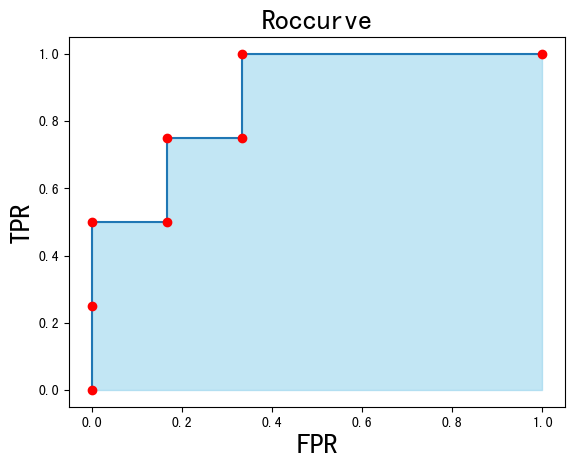

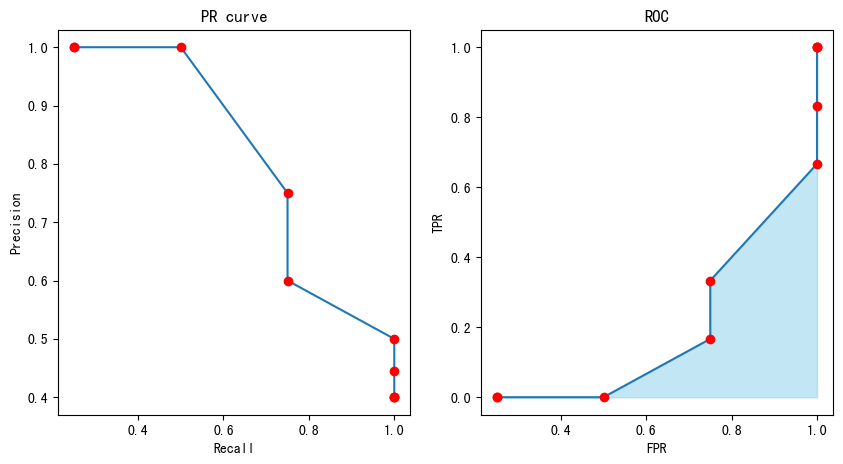

In [20]:
# 作业:PR，ROC curves and AUC
def my_PR_RUC_AOC(y_true:list[int],y_score: list[float],thresholds=[i/10 for i in range(1,10)]):
    '''
    Parameters:
    y_true: the true label
    y_score: the predicted probability
    threadsholds: the threadsholds for the predicted probability
    Return:
    Precision: the precision of the model
    Recall: the recall of the model
    TPR: the true positive rate
    FPR: the false positive rate
    AUC: the area under the curve
    '''
    Recall=[]
    Precison=[]
    FPR=[]
    TPR=[]
    for threshold in thresholds: 
        TP,FP,TN,FN = 0,0,0,0
        for t,s in zip(y_true,y_score):
            if s >= threshold and t == 1:
                TP+=1
            elif s >= threshold and t == 0:
                FP+=1
            elif s < threshold and t == 0:
                TN+=1
            elif s < threshold and t == 1:
                FN+=1 
        R = TP / (TP + FN) if (TP + FN) > 0 else 0
        P = TP / (TP + FP) if (TP + FP) > 0 else 0
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
        Recall.append(R)
        Precison.append(P)
        FPR.append(fpr)
        TPR.append(tpr)
    sorted_indexes = np.argsort(FPR)
    sorted_FPR = np.array(FPR)[sorted_indexes]
    sorted_TPR = np.array(TPR)[sorted_indexes]
    # 使用排序后的FPR和TPR计算AUC
    AUC = 0.5 * np.sum([(sorted_FPR[i+1] - sorted_FPR[i]) * (sorted_TPR[i+1] + sorted_TPR[i]) for i in range(len(sorted_FPR)-1)])
    return Precison,Recall,TPR,FPR,AUC
# 测试数据
y_true=[1,1,0,1,0,0,1,0,0,0]
y_score=[0.9,0.42,0.2,0.6,0.5,0.41,0.7,0.4,0.65,0.35]
# 库函数
FPR, TPR, TH = roc_curve(y_true, y_score,sample_weight=None,)
auc=roc_auc_score(y_true,y_score,sample_weight=None)
print(f"{auc=}\nfpr:{FPR}\ntpr:{TPR}\nth:{TH}")
#绘图
f=plt.plot(FPR, TPR)
plt.plot(FPR, TPR, 'ro')
plt.title("Roccurve",fontsize =20)
plt.ylabel('TPR',fontsize=20)
plt.xlabel('FPR',fontsize =20)
plt.fill_between(FPR,TPR,0,color='skyblue',alpha=0.5)#填充颜色
#自己写的函数
thresholds=[i/10 for i in range(0,10,1)]
precision, recall, TPR, FPR, AUC=my_PR_RUC_AOC(y_true,y_score,thresholds)
# 绘图
fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].plot(recall,precision)
axs[0].plot(recall,precision,'ro')
axs[0].set_title('PR curve')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[1].plot(TPR,FPR)
axs[1].plot(TPR,FPR,'ro')
axs[1].set_title('ROC')
axs[1].set_xlabel('FPR')
axs[1].set_ylabel('TPR')
axs[1].fill_between(TPR,FPR,0,color='skyblue',alpha=0.5)#填充颜色
print(f"{AUC=}\nPrecision:{precision}\nRecall:{recall}\nTPR:{TPR}\nFPR:{FPR}",sep=',')

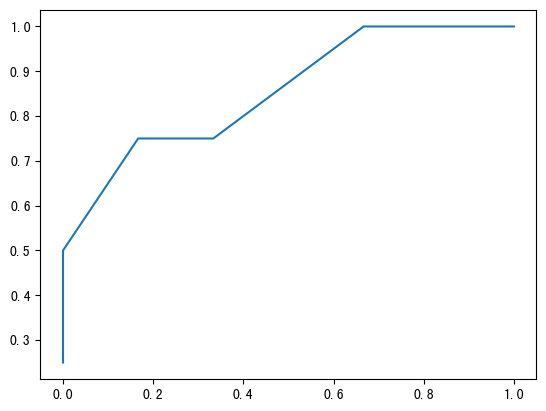

In [11]:
y_true = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
y_score = [0.9,0.42,0.2,0.6,0.5,0.41,0.7,0.4,0.65,0.35]
shreshold=[0.9,0.7,0.5]
plt.plot(FPR, TPR)

#### 马修斯相关系数（Matthews Correlation Coefficient, MCC）
马修斯相关系数（Matthews Correlation Coefficient, MCC）是一个用于衡量二分类（二元分类）模型性能的指标，它考虑了真正类（TP）、假正类（FP）、真负类（TN）和假负类（FN）四种情况。

MCC可以被认为是一个平衡的度量，适用于不平衡数据集，能够在一个数值中综合考虑到所有四个象限的信息。

##### 计算公式

$ \text{MCC} = \frac{(TP \times TN) - (FP \times FN)}{\sqrt{(TP+FP) \times (TP+FN) \times (TN+FP) \times (TN+FN)}}$
##### 特点

- **值的范围**：MCC的值范围从-1到1。
  - **1** 表示一个完美的预测。
  - **0** 表示一个平均随机预测。
  - **-1** 表示一个完全错误的预测。

- **平衡性**：MCC是一个平衡的指标，即使在数据集类别不平衡的情况下，MCC仍能提供一个合理的性能评估。

##### 优点

- **综合性**：MCC考虑了所有四种分类情况（TP, FP, TN, FN），提供了一个全面的模型评估。
- **适用性**：对于不平衡数据集非常有效，因为它同时考虑了正类和负类的预测准确性和错误率。

##### 缺点

- **解释性**：与准确率、精确率、召回率相比，MCC的物理意义不那么直观，可能更难以向非专业人士解释。

MCC是一个非常有用的度量，特别是在处理类别不平衡的数据集时，它可以提供比传统的准确率或F1分数更全面、更平衡的性能评估。

In [12]:
def Matthews_Correlation_Coefficient(y_true: list[int], y_score: list[float], thresholds=[i/10 for i in range(1, 10)]):
    '''
    Parameters:
    y_true: the true label
    y_score: the predicted probability
    threadsholds: the threadsholds for the predicted probability
    Return:
    mcc: the Matthews Correlation Coefficient
    '''
    mcc=[]
    for threshold in thresholds:
        TP, FP, TN, FN = 0, 0, 0, 0
        for t, s in zip(y_true, y_score):
            if s >= threshold and t == 1:
                TP += 1
            elif s >= threshold and t == 0:
                FP += 1
            elif s < threshold and t == 0:
                TN += 1
            elif s < threshold and t == 1:
                FN += 1
        mcc.append((TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
    return mcc
    
Matthews_Correlation_Coefficient(y_true, y_score, shreshold)

[0.408248290463863, 0.6123724356957946, 0.408248290463863]

#### F1
F1度量是精确率和召回率的调和平均值,调和平均数更注重较小值
##### 调和平均
调和平均数对于较小的数值更加敏感。当用于精确率和召回率时，如果其中一个非常低，那么调和平均数（即F1分数）也会很低，从而强调了精确率和召回率之间的平衡。这是因为在评估模型时，同时拥有高精确率和高召回率是非常重要的。如果模型的精确率很高而召回率很低，或者召回率很高而精确率很低，这都不是理想的情况。调和平均数确保了只有当精确率和召回率都较高时，F1分数才会高。
##### 计算
$$F1=2\times \frac{ P \times R}{P+R}$$

#### 加权F1（Weighted F1 Score）

加权F1度量是考虑每个类别重要性（一般基于类别的样本量）的F1度量。

在多类分类问题中，每个类别的F1度量根据其在数据集中的比重（权重）被加权平均，以得到加权F1度量。

这对于不平衡的数据集尤其重要，因为它确保了少数类别的性能也会被考虑在内。加权F1度量的计算方法是：

1. 对每个类别计算F1度量。
2. 根据每个类别的实际样本量（或其他给定的权重）来加权这些F1度量。
3. 计算这些加权F1度量的平均值。

加权F1度量更适用于不平衡数据集，因为它可以反映所有类别的性能，而不是被主导类别所主导。

##### 计算
在二分类任务中:
$$
F_{\beta}=\frac{(1+\beta^{2})\times P\times R}{(\beta^{2}\times P)+R}
$$
其中β>0度量了查全率对查准率的相对重要性.
- β=1时退化为标准的F1
- β>1时查全率有更大影响
- β<1时查准率有更大影响.
